In [50]:
# pip install scikit-posthocs
# pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# 乱数のシードを設定
np.random.seed(0)

# 銘柄名を生成
tickers = [f"銘柄_{i}" for i in range(200)]

# 月を生成
months = [f"20230{i}" for i in range(1, 6)] + [f"2022{str(i).zfill(2)}" for i in range(8, 13)]

# セクター情報
sectors = ['IT', '製造業', '金融', '建設', '小売', 'エネルギー']
# 国
countries = ["US", "UK", "AUD", "GE"]

# それぞれの銘柄と月に対してランダムなデータを生成
data = []
for ticker in tickers:
    sector = np.random.choice(sectors)
    country = np.random.choice(countries)
    for month in months:
        oas = np.random.uniform(50, 200)  # OAS
        roa = np.random.uniform(0, 10)    # ROA
        ebitda = np.random.uniform(1000, 5000)  # EBITDA
        coupon_rate = np.random.uniform(1, 5)  # クーポン率
        flag = np.random.choice([0, 1])  # 適当なフラグ

        data.append([ticker, month, oas, roa, ebitda, coupon_rate, sector, country, flag])

df = pd.DataFrame(data, columns=["銘柄名", "月", "OAS", "ROA", "EBITDA", "クーポン率", "セクター", "最終国リスク", "フラグ"])

In [51]:
with PdfPages(r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + r'\all_heatmaps.pdf') as pdf:
    for month in months:
        # 1. 各月のクロスセクションデータを取得
        df_month = df[df['月'] == month]

        # ペアワイズの順位相関を計算
        correlation_matrix = df_month[['OAS', 'ROA', 'EBITDA', 'クーポン率']].rank().corr(method='spearman')

        # 2. ヒートマップの作成
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'{month} クロスセクション 順位相関')
        plt.tight_layout()

        # 3. このヒートマップをPDFに追加
        pdf.savefig()
        plt.close()

c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12509 (\N{KATAKANA LETTER PO}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.draw()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1007046475.py:13: UserWarning: Glyph 12463 

In [52]:
def create_graphs(dataframe, variable_1, threshold, variable_2, flag_column='フラグ'):
    # 閾値を基にデータを2つのグループに分割
    above_threshold = dataframe[dataframe[variable_1] >= threshold]
    below_threshold = dataframe[dataframe[variable_1] < threshold]
    
    def plot_scatter_for_group(group, filename):
        with PdfPages(filename) as pdf:
            for value in group[variable_2].unique():
                subset = group[group[variable_2] == value]
                plt.figure(figsize=(8,6))
                
                # フラグに基づいて色を指定して散布図を描画
                for flag_value, color in zip([0, 1], ['blue', 'red']):
                    flag_subset = subset[subset[flag_column] == flag_value]
                    plt.scatter(flag_subset[variable_2], flag_subset[variable_1], 
                                color=color, label=f'Flag = {flag_value}')
                
                plt.title(f'{variable_1} vs. {variable_2} for {variable_2} = {value}')
                plt.xlabel(variable_2)
                plt.ylabel(variable_1)
                plt.legend()
                plt.tight_layout()
                pdf.savefig()
                plt.close()
    
    # 閾値以上・以下のデータに対して散布図を作成
    plot_scatter_for_group(above_threshold, r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f'/above_{threshold}.pdf')
    plot_scatter_for_group(below_threshold, r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f'/below_{threshold}.pdf')


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

def create_scatter(dataframe, variable_1, threshold, variable_2, variable_3, variable_4, flag_column='フラグ'):
    # 閾値を基にデータを2つのグループに分割
    above_threshold = dataframe[dataframe[variable_1] >= threshold]
    below_threshold = dataframe[dataframe[variable_1] < threshold]
    
    def plot_scatter_for_group(group, filename):
        with PdfPages(filename) as pdf:
            for value in group[variable_2].unique():
                subset = group[group[variable_2] == value]
                plt.figure(figsize=(8,6))
                
                # フラグに基づいて色を指定して散布図を描画
                for flag_value, color in zip([0, 1], ['blue', 'red']):
                    flag_subset = subset[subset[flag_column] == flag_value]
                    plt.scatter(flag_subset[variable_4], flag_subset[variable_3], 
                                color=color, label=f'Flag = {flag_value}')
                
                plt.title(f'{variable_3} vs. {variable_4} for {variable_2} = {value}')
                plt.xlabel(variable_4)
                plt.ylabel(variable_3)
                plt.legend()
                plt.tight_layout()
                pdf.savefig()
                plt.close()
    
    # 閾値以上・以下のデータに対して散布図を作成
    plot_scatter_for_group(above_threshold, r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f'/above_{threshold}.pdf')
    plot_scatter_for_group(below_threshold, r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f'/below_{threshold}.pdf')


In [54]:
# 使用例
create_scatter(df, 'ROA', 5, 'セクター', 'EBITDA', 'OAS')

C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1588943930.py:28: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1588943930.py:28: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1588943930.py:28: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1588943930.py:28: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1588943930.py:28: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/1588943930.py:28: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from cur

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

def run_anova(df: pd.DataFrame, dependent_var: str, independent_var: str) -> pd.DataFrame:
    """
    df: データフレーム
    dependent_var: 被説明変数の列名 (例: "OAS")
    independent_var: 説明変数の列名 (例: "セクター")
    
    return: ANOVAの結果のテーブル
    """
    
    # ANOVAのモデルの式を生成
    formula = f"{dependent_var} ~ {independent_var}"
    
    # ANOVAのモデルを定義
    model = ols(formula, data=df).fit()
    
    # ANOVAのテーブルを生成
    aov_table = sm.stats.anova_lm(model, typ=2)
    
    return aov_table


### 多次元配置分散分析（MANOVA: Multivariate Analysis of Variance）
複数の被説明変数に対して、一つまたは複数のカテゴリカルな説明変数が与える影響を同時に調べるための統計的手法です。

In [56]:
def run_manova(df: pd.DataFrame, dependent_vars: list, independent_var: str):
    """
    df: データフレーム
    dependent_vars: 複数の被説明変数の列名のリスト
    independent_var: 説明変数の列名
    
    return: MANOVAの結果
    """
    
    # 被説明変数を結合して、一つの式として表現
    dependent_formula = " + ".join(dependent_vars)
    formula = f"{dependent_formula} ~ {independent_var}"
    
    # MANOVAモデルの適用
    maov = sm.MANOVA.from_formula(formula, data=df)
    
    # MANOVAの結果の取得
    result = maov.mv_test()
    
    return result

In [57]:
result = run_manova(df, ['セクター', '月'], 'OAS')
print(result)

                                  Multivariate linear model
                                                                                              
----------------------------------------------------------------------------------------------
       Intercept                Value          Num DF   Den DF          F Value         Pr > F
----------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 15.0000 1984.0000 -22910619642828500.0000 1.0000
         Pillai's trace                1.0000 15.0000 1984.0000 -22910619642828504.0000 1.0000
 Hotelling-Lawley trace -173215370283481.6250 15.0000 1984.0000 -22910619642828504.0000 1.0000
    Roy's greatest root -173215370283481.6250 15.0000 1984.0000 -22910619642828504.0000 1.0000
----------------------------------------------------------------------------------------------
                                                                                     

In [58]:
from scipy.stats import kruskal

def run_rank_based_anova(df: pd.DataFrame, dependent_var: str, independent_var: str):
    """
    df: データフレーム
    dependent_var: 被説明変数の列名
    independent_var: 説明変数の列名 (カテゴリカル変数である必要があります)
    
    return: Kruskal-Wallis Hテストの結果 (統計量, p値)
    """
    
    # カテゴリごとにデータを取得
    groups = [df[dependent_var][df[independent_var] == group] for group in df[independent_var].unique()]
    
    # Kruskal-Wallis Hテストの適用
    result = kruskal(*groups)
    
    return result


### 順位付け分散分析（Rank-based ANOVA）
通常のANOVAが正規性の仮定を満たさない場合や等分散性の仮定を満たさない場合などに使用される手法の一つで、Kruskal-Wallis Hテストとしても知られています。

In [59]:
result = run_rank_based_anova(df, "OAS", "セクター")
print(f"統計量: {result.statistic}, p値: {result.pvalue}")

統計量: 2.1282840466801645, p値: 0.8311248803892728


In [60]:
def run_games_howell(df: pd.DataFrame, dependent_var: str, independent_var: str) -> pd.DataFrame:
    """
    df: データフレーム
    dependent_var: 被説明変数の列名
    independent_var: 説明変数の列名 (カテゴリカル変数である必要があります)
    
    return: Games-Howellのペアワイズ検定の結果
    """
    
    # Games-Howell検定の適用
    result = sp.posthoc_ttest(df, val_col=dependent_var, group_col=independent_var, p_adjust='holm')
    
    return result

In [61]:
import scikit_posthocs as sp

result = run_games_howell(df, "OAS", "セクター")
print(result)

        小売   金融   IT   建設  エネルギー  製造業
小売     1.0  1.0  1.0  1.0    1.0  1.0
金融     1.0  1.0  1.0  1.0    1.0  1.0
IT     1.0  1.0  1.0  1.0    1.0  1.0
建設     1.0  1.0  1.0  1.0    1.0  1.0
エネルギー  1.0  1.0  1.0  1.0    1.0  1.0
製造業    1.0  1.0  1.0  1.0    1.0  1.0


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_variable_over_time_country(df: pd.DataFrame, time_column: str, sector_column: str, country_column: str, value_column: str, pdf_path: str):
    """
    Args:
    - df (pd.DataFrame): 指定されたカラムを持つデータフレーム
    - time_column (str): 時間を示すカラム名
    - sector_column (str): セクターを示すカラム名
    - country_column (str): 国を示すカラム名
    - value_column (str): プロットする値のカラム名
    - pdf_path (str): グラフを保存するPDFのパス

    Returns:
    - None
    """

    with PdfPages(pdf_path) as pdf:
        grouped = df.groupby([time_column, sector_column, country_column]).mean().reset_index()
        countries = grouped[country_column].unique()
        num_countries = len(countries)

        for country in countries:
            fig, ax = plt.subplots(figsize=(10, 6))
            subset_country = grouped[grouped[country_column] == country]
            for sector in subset_country[sector_column].unique():
                subset = subset_country[subset_country[sector_column] == sector]
                
                ax.plot(subset[time_column], subset[value_column], label=sector)

            ax.set_title(f'{country} {value_column} by {sector_column} over time')
            ax.set_ylabel(f'Average {value_column}')
            ax.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            pdf.savefig(fig)  # Save the current figure to the PDF
            plt.close(fig)

    print(f"Saved the plots to {pdf_path}")

In [69]:
plot_variable_over_time_country(df,
                                time_column='月',
                                sector_column='セクター',
                                country_column='最終国リスク',
                                value_column='OAS',
                                pdf_path = r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f"/output.pdf"
                                )

C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/2135239591.py:35: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/2135239591.py:35: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/2135239591.py:35: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/2135239591.py:35: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/2135239591.py:35: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  plt.tight_layout()
C:\Users\bldyr\AppData\Local\Temp/ipykernel_23224/2135239591.py:35: UserWarning: Glyph 12493 (\N{KATAKANA LETTER NE}) missing from current font.
  plt.

Saved the plots to C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価/output.pdf


#### ヒートマップ:

「月」と「セクター」の組み合わせごとの「OAS」の平均値や中央値をカラーコードで表示。
これにより、特定の月やセクターで「OAS」が高くなっているか、または低くなっているかを一目で確認することができる。

c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12493 (\N{KATAKANA LETTER NE}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12462 (\N{KATAKANA LETTER GI}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.draw()
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 235

Saved the heatmap to heatmap.png


c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12493 (\N{KATAKANA LETTER NE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bldyr\anaconda3\envs\For_Study\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12462 (\N{KATAKANA LETTER GI}) missing from curr

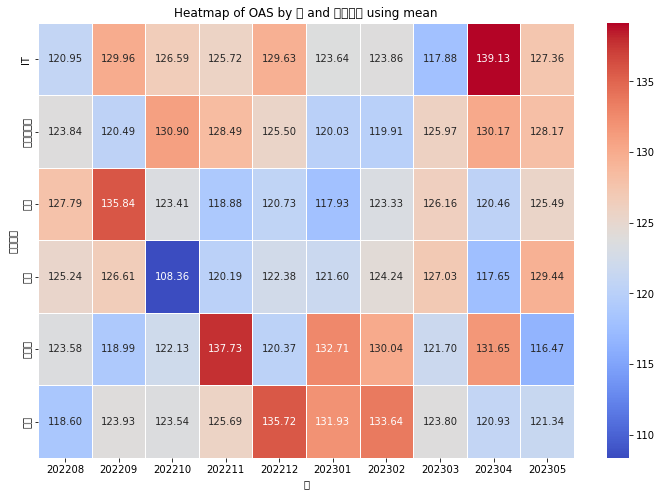

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df: pd.DataFrame, time_column: str, sector_column: str, value_column: str, agg_func='mean', save_path=None):
    """
    Args:
    - df (pd.DataFrame): 指定されたカラムを持つデータフレーム
    - time_column (str): 時間を示すカラム名
    - sector_column (str): セクターを示すカラム名
    - value_column (str): ヒートマップで表示する値のカラム名
    - agg_func (str): 集約関数 ('mean'または'median')
    - save_path (str, optional): ヒートマップを保存する場所。Noneの場合、保存しない。

    Returns:
    - None
    """
    
    if agg_func == 'mean':
        pivot_table = df.pivot_table(index=sector_column, columns=time_column, values=value_column, aggfunc='mean')
    elif agg_func == 'median':
        pivot_table = df.pivot_table(index=sector_column, columns=time_column, values=value_column, aggfunc='median')
    else:
        raise ValueError("agg_func must be 'mean' or 'median'")
    
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, ax=ax)
    
    plt.title(f'Heatmap of {value_column} by {time_column} and {sector_column} using {agg_func}')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f'Saved the heatmap to {save_path}')
    else:
        plt.show()

plot_heatmap(df, time_column='月', sector_column='セクター', value_column='OAS', agg_func='mean',
             save_path=r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f"heatmap.png"
             )


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_heatmap_to_pdf(df: pd.DataFrame, time_column: str, sector_column: str, value_column: str, agg_func='mean', save_path='heatmap.pdf'):
    """
    Args:
    - df (pd.DataFrame): 指定されたカラムを持つデータフレーム
    - time_column (str): 時間を示すカラム名
    - sector_column (str): セクターを示すカラム名
    - value_column (str): ヒートマップで表示する値のカラム名
    - agg_func (str): 集約関数 ('mean'または'median')
    - save_path (str, optional): ヒートマップを保存する場所。

    Returns:
    - None
    """
    
    if agg_func == 'mean':
        pivot_table = df.pivot_table(index=sector_column, columns=time_column, values=value_column, aggfunc='mean')
    elif agg_func == 'median':
        pivot_table = df.pivot_table(index=sector_column, columns=time_column, values=value_column, aggfunc='median')
    else:
        raise ValueError("agg_func must be 'mean' or 'median'")
    
    with PdfPages(save_path) as pdf:
        fig, ax = plt.subplots(figsize=(12, 8))
        sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, ax=ax)
        plt.title(f'Heatmap of {value_column} by {time_column} and {sector_column} using {agg_func}')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

    print(f'Saved the heatmap to {save_path}')

# 使用例
data = pd.DataFrame({
    '月': ['202208', '202208', '202208', '202209', '202209', '202209', '202210', '202210', '202210'] * 2,
    'セクター': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'] * 2,
    'OAS': [5, 6, 7, 5.5, 6.5, 7.5, 5.7, 6.8, 7.7] * 2
})

plot_heatmap_to_pdf(data, time_column='月', sector_column='セクター', value_column='OAS', agg_func='mean')


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_heatmap_by_country_to_pdf(df: pd.DataFrame, time_column: str, sector_column: str, country_column: str, value_column: str, agg_func='mean',
                                   save_path=r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f"/heatmap_by_country.pdf"):
    """
    Args:
    - df (pd.DataFrame): 指定されたカラムを持つデータフレーム
    - time_column (str): 時間を示すカラム名
    - sector_column (str): セクターを示すカラム名
    - country_column (str): 国を示すカラム名
    - value_column (str): ヒートマップで表示する値のカラム名
    - agg_func (str): 集約関数 ('mean'または'median')
    - save_path (str, optional): ヒートマップを保存する場所。

    Returns:
    - None
    """
    
    with PdfPages(save_path) as pdf:
        for country in df[country_column].unique():
            filtered_df = df[df[country_column] == country]
            if agg_func == 'mean':
                pivot_table = filtered_df.pivot_table(index=sector_column, columns=time_column, values=value_column, aggfunc='mean')
            elif agg_func == 'median':
                pivot_table = filtered_df.pivot_table(index=sector_column, columns=time_column, values=value_column, aggfunc='median')
            else:
                raise ValueError("agg_func must be 'mean' or 'median'")
            
            fig, ax = plt.subplots(figsize=(12, 8))
            sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, ax=ax)
            plt.title(f'Heatmap of {value_column} by {time_column} and {sector_column} in {country} using {agg_func}')
            pdf.savefig(fig, bbox_inches='tight')
            plt.close()

    print(f'Saved the heatmap to {save_path}')

plot_heatmap_by_country_to_pdf(df, time_column='月', sector_column='セクター', country_column='最終国リスク', value_column='OAS', agg_func='mean')


NameError: name 'df' is not defined

### 箱ひげ図 (Boxplot):

各「セクター」ごとの「OAS」の分布を見ることができる。
これにより、セクターごとの中央値、四分位数、外れ値などの統計的な情報を把握することができる。
さらに、箱ひげ図を「月」ごとに作成することで、時間経過とともに「OAS」がどのように変動するかを視覚的に捉えることができる。

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_boxplots_by_month_to_pdf(df: pd.DataFrame, time_column: str, sector_column: str, value_column: str,
                                  save_path=r"C:\Users\bldyr\OneDrive\デスクトップ\自己研鑽用\02_FT勉強会\2023年度\SDGs債パフォーマンス評価" + f'/boxplots_by_month.pdf'):
    """
    Args:
    - df (pd.DataFrame): 指定されたカラムを持つデータフレーム
    - time_column (str): 時間を示すカラム名
    - sector_column (str): セクターを示すカラム名
    - value_column (str): 箱ひげ図で表示する値のカラム名
    - save_path (str, optional): 箱ひげ図を保存する場所。

    Returns:
    - None
    """
    
    with PdfPages(save_path) as pdf:
        for month in df[time_column].unique():
            filtered_df = df[df[time_column] == month]
            fig, ax = plt.subplots(figsize=(12, 8))
            sns.boxplot(x=sector_column, y=value_column, data=filtered_df, ax=ax)
            plt.title(f'Boxplot of {value_column} by {sector_column} in {month}')
            pdf.savefig(fig, bbox_inches='tight')
            plt.close()

    print(f'Saved the boxplots to {save_path}')

plot_boxplots_by_month_to_pdf(df, time_column='月', sector_column='セクター', value_column='OAS')


NameError: name 'df' is not defined

相互作用を考慮することで、ある変数の効果が別の変数の水準によってどのように変わるかを検討することができます。例えば、商品の価格と広告の効果の相互作用を考えた場合、高価な商品での広告の効果と、低価な商品での広告の効果が異なるかどうかを調べることができます。

具体的な手順は以下の通りです：

変数の作成: 目的の変数とダミー変数の交差項（積）を作成します。この新しい変数が相互作用項となります。

回帰モデルの作成: 目的変数を従属変数として、主効果（元の変数）と相互作用項を含む回帰モデルを作成します。

モデルの評価: 回帰モデルを評価して、相互作用項の係数が統計的に有意であるかを確認します。有意であれば、相互作用が存在すると判断できます。

解釈: 相互作用項の係数の正負や大きさをもとに、その効果の方向や強さを解釈します。

可視化: 結果をより直感的に理解するために、相互作用の効果をグラフにして可視化することが推奨されます。

例えば、Pythonのstatsmodelsを使用して相互作用を検討する場合のコードは以下のようになります。

In [4]:
import statsmodels.api as sm

# ダミー変数と別の変数の交差項を作成
df['interaction'] = df['dummy_variable'] * df['another_variable']

# 回帰モデルの作成
X = df[['dummy_variable', 'another_variable', 'interaction']]
X = sm.add_constant(X)  # 切片を追加
y = df['target_variable']

model = sm.OLS(y, X).fit()

# 結果の表示
print(model.summary())


NameError: name 'df' is not defined

#### 追加分

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


def generate_filled_dataframe(df, time_column):
    all_months = pd.date_range(start=df[time_column].min(), end=df[time_column].max(), freq='M')
    all_months_df = pd.DataFrame({time_column: all_months})
    filled_df = pd.merge(all_months_df, df, on=time_column, how='left')
    filled_df.fillna(method='ffill', inplace=True)
    return filled_df


def plot_for_country(df, time_column, sector_column, value_column, country):
    fig, ax = plt.subplots(figsize=(10, 6))
    subset_country = df[df[country_column] == country]

    for sector in subset_country[sector_column].unique():
        subset = subset_country[subset_country[sector_column] == sector]
        ax.plot(subset[time_column], subset[value_column], label=sector)s

    ax.set_title(f'{country} {value_column} by {sector_column} over time')
    ax.set_ylabel(f'Average {value_column}')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    return fig


def plot_variable_over_time_country(df: pd.DataFrame, time_column: str, sector_column: str, country_column: str, value_column: str, pdf_path: str):
    with PdfPages(pdf_path) as pdf:
        grouped = df.groupby([time_column, sector_column, country_column]).mean().reset_index()
        filled_grouped = generate_filled_dataframe(grouped, time_column)
        countries = grouped[country_column].unique()

        for country in countries:
            fig = plot_for_country(filled_grouped, time_column, sector_column, value_column, country)
            pdf.savefig(fig)
            plt.close(fig)

    print(f"Saved the plots to {pdf_path}")


# 上記のコードでは、データの欠損値を補完する処理と、国ごとのプロットを生成する処理を別々の関数として定義しています。
# これにより、各関数の目的が明確になり、コードの再利用性と可読性が向上します。


In [ ]:
import pandas as pd

def manova_to_excel(result, output_path):
    """
    result: MANOVAの結果オブジェクト
    output_path: 出力するExcelファイルのパス
    
    return: None
    """
    with pd.ExcelWriter(output_path) as writer:
        for test, content in result.items():
            for stat, table in content.items():
                if isinstance(table, pd.DataFrame):
                    table.to_excel(writer, sheet_name=f"{test}_{stat}")
    
    print(f"Saved the results to {output_path}")

# 使用例:
# result = run_manova(df, dependent_vars, independent_var)
# manova_to_excel(result, 'manova_results.xlsx')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_oas_change_rate_by_group(df, by_country=True, by_sector=False, output_prefix="graph"):
    if by_country:
        # Country-based calculation
        df_sorted = df.sort_values(by=['country', 'date'])
        df_sorted['OAS_change'] = df_sorted.groupby('country')['OAS'].pct_change()
        ax = df_sorted.groupby(['date', 'country'])['OAS_change'].mean().unstack().plot(kind='bar', figsize=(10, 5))
        plt.title("OAS Change Rate by Country")
        plt.ylabel("OAS Change Rate")
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height, '{:1.2f}'.format(height), ha="center", va='bottom', fontsize=8)
        plt.tight_layout()
        plt.savefig(f"{output_prefix}_country_rate.pdf")
        plt.close()

    if by_sector:
        # Sector-based calculation
        df_sorted = df.sort_values(by=['sector', 'date'])
        df_sorted['OAS_change'] = df_sorted.groupby('sector')['OAS'].pct_change()
        ax = df_sorted.groupby(['date', 'sector'])['OAS_change'].mean().unstack().plot(kind='bar', figsize=(10, 5))
        plt.title("OAS Change Rate by Sector")
        plt.ylabel("OAS Change Rate")
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height, '{:1.2f}'.format(height), ha="center", va='bottom', fontsize=8)
        plt.tight_layout()
        plt.savefig(f"{output_prefix}_sector_rate.pdf")
        plt.close()

# サンプルデータの使用例（データは適切に修正してください）
data = {
    'date': ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05", "2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
    'OAS': [100, 102, 98, 105, 110, 105, 104, 110, 108, 102],
    'country': ['Japan', 'Japan', 'USA', 'USA', 'Japan', 'USA', 'USA', 'Japan', 'USA', 'Japan'],
    'sector': ['Tech', 'Finance', 'Tech', 'Finance', 'Tech', 'Tech', 'Finance', 'Finance', 'Finance', 'Tech']
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])  # Ensure that the date column is in datetime format

plot_oas_change_rate_by_group(df, by_country=True, by_sector=True, output_prefix="report")


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def cluster_sectors_by_metric(df, category_column_name, target_column_name, output_pdf="clustered_result.pdf"):
    # カテゴリー別の目的変数の平均を計算
    df_grouped = df.groupby(category_column_name)[target_column_name].mean().reset_index()
    
    # 2次元のデータフレームを作成
    X = df_grouped[[target_column_name]]
    
    # KMeansクラスタリングを適用
    kmeans = KMeans(n_clusters=3)
    df_grouped['cluster'] = kmeans.fit_predict(X)
    
    # クラスタリング結果を表示
    for cluster_num in df_grouped['cluster'].unique():
        print(f"Cluster {cluster_num}:")
        categories_in_cluster = df_grouped[df_grouped['cluster'] == cluster_num][category_column_name].tolist()
        print(", ".join(categories_in_cluster))
        print()
    
    # クラスタリング結果をグラフに描画し、PDFに保存
    plt.figure(figsize=(10, 6))
    plt.scatter(df_grouped[category_column_name], df_grouped[target_column_name], c=df_grouped['cluster'], cmap='rainbow', s=100)
    plt.xlabel(category_column_name)
    plt.ylabel(target_column_name)
    plt.title(f'Clustering by {target_column_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_pdf)
    plt.close()

# サンプルデータの使用例
data = {
    'OAS': [100, 102, 98, 105, 110, 105, 104, 110, 108, 102],
    'sector': ['Tech', 'Finance', 'Tech', 'Finance', 'Tech', 'Tech', 'Finance', 'Finance', 'Finance', 'Tech']
}
df = pd.DataFrame(data)

cluster_sectors_by_metric(df, 'sector', 'OAS', "clustered_result.pdf")
